In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [49]:
df = pd.read_csv("./data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [51]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [52]:
df.duplicated().sum()

np.int64(0)

In [53]:
for i in df.columns:
    if df[i].dtype == "object":
        print("--------------------------------------------------------------")
        print(f"{i} : {df[i].unique()}")
        print()
        print(df[i].value_counts())
        print("--------------------------------------------------------------")

--------------------------------------------------------------
gender : ['female' 'male']

gender
female    518
male      482
Name: count, dtype: int64
--------------------------------------------------------------
--------------------------------------------------------------
race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
--------------------------------------------------------------
--------------------------------------------------------------
parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
-----------------------------------------------------------

In [54]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [55]:
numerical_features = [i for i in df.columns if df[i].dtype != "object"]
categorical_features = [i for i in df.columns if df[i].dtype == "object"]
print("Numerical Features : ", numerical_features)
print("Categorical Features : ", categorical_features)

Numerical Features :  ['math_score', 'reading_score', 'writing_score']
Categorical Features :  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Feature Engineering

In [56]:
df["Total_Score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["Average_Score"] = df["Total_Score"] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Histogram Visualization

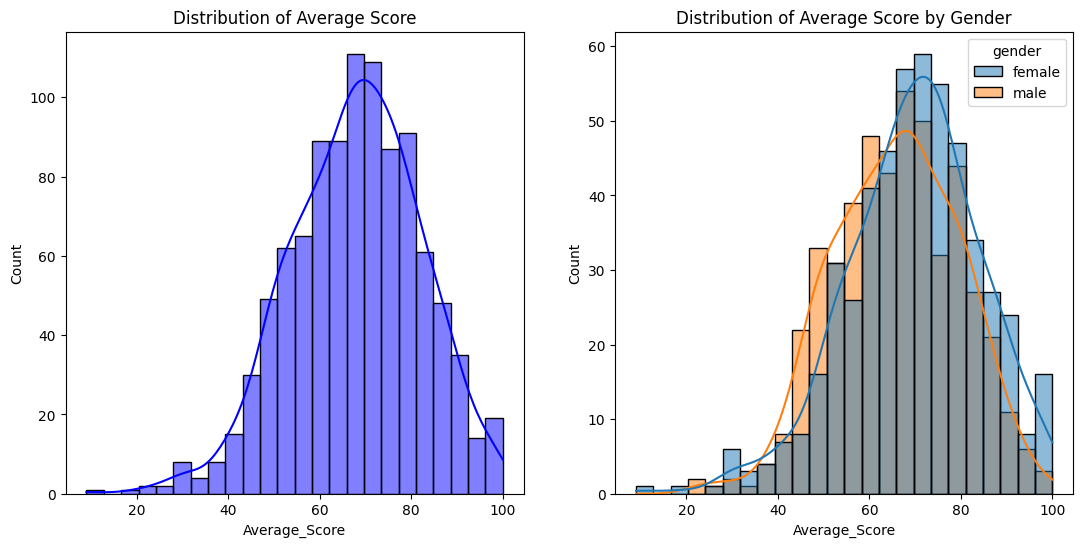

In [57]:
fig, axes = plt.subplots(1, 2, figsize = (13,6))
plt.subplot(1,2,1)
sns.histplot(df["Average_Score"], kde = True, color = "blue")
plt.title("Distribution of Average Score")
plt.subplot(1,2,2)
sns.histplot(data=df, x="Average_Score", kde = True, hue = "gender")
plt.title("Distribution of Average Score by Gender")
plt.show()

### Girls score more than boys

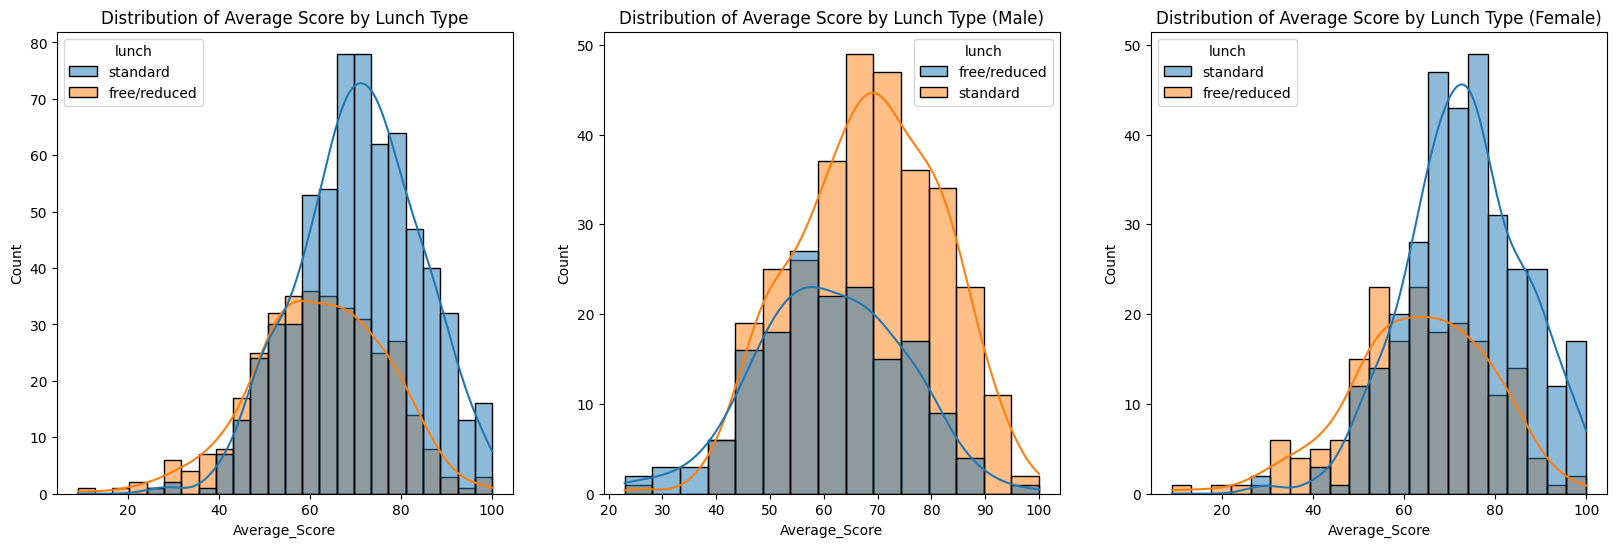

In [58]:
fig, axes = plt.subplots(1,3, figsize = (20,6))
plt.subplot(1,3,1)
sns.histplot(data=df, x="Average_Score", kde=True, hue="lunch")
plt.title("Distribution of Average Score by Lunch Type")
plt.subplot(1,3,2)
sns.histplot(data=df[df["gender"]=="male"], x="Average_Score", kde=True, hue="lunch")
plt.title("Distribution of Average Score by Lunch Type (Male)")
plt.subplot(1,3,3)
sns.histplot(data=df[df["gender"]=="female"], x="Average_Score", kde=True, hue="lunch")
plt.title("Distribution of Average Score by Lunch Type (Female)")
plt.show()

#### Standard lunch helps students score better marks whether it be boys or girls

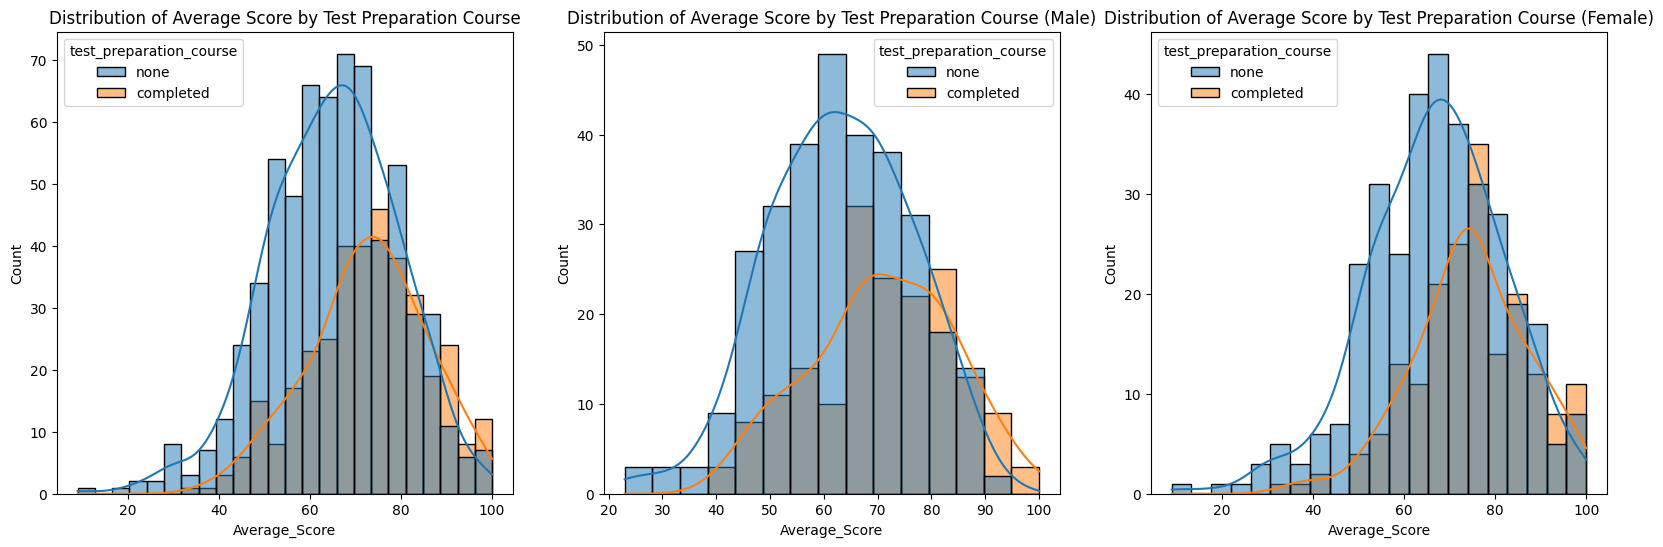

In [59]:
fig, axes = plt.subplots(1,3, figsize = (20,6))
plt.subplot(1,3,1)
sns.histplot(data=df, x="Average_Score", kde=True, hue="test_preparation_course")
plt.title("Distribution of Average Score by Test Preparation Course")
plt.subplot(1,3,2)
sns.histplot(data=df[df["gender"]=="male"], x="Average_Score", kde=True, hue="test_preparation_course")
plt.title("Distribution of Average Score by Test Preparation Course (Male)")
plt.subplot(1,3,3)
sns.histplot(data=df[df["gender"]=="female"], x="Average_Score", kde=True, hue="test_preparation_course")
plt.title("Distribution of Average Score by Test Preparation Course (Female)")
plt.show()

#### In general, the people who have not completed for the test preparation Course, have scored more. 

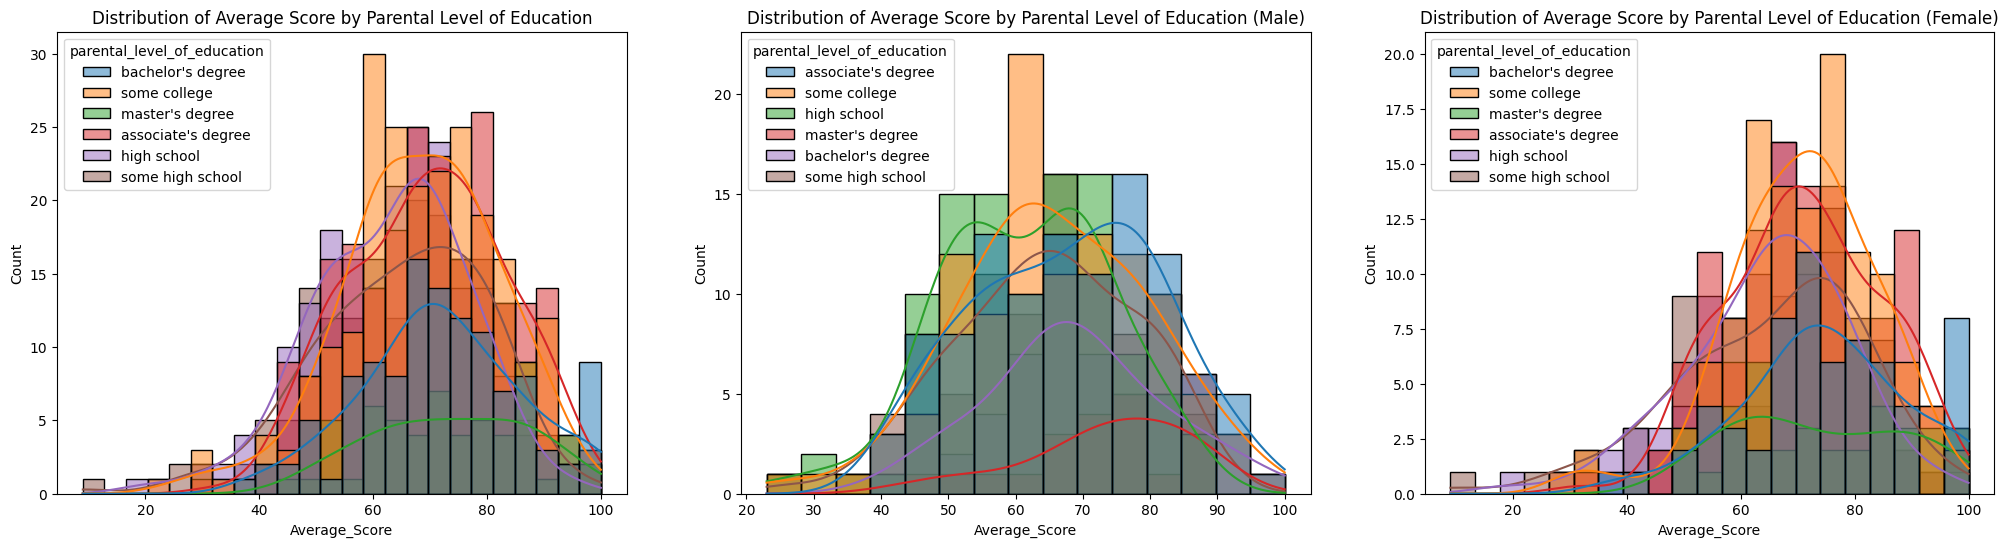

In [60]:
fig, axes = plt.subplots(1,3, figsize = (25,6))
plt.subplot(1,3,1)
sns.histplot(data=df, x="Average_Score", kde=True, hue="parental_level_of_education")
plt.title("Distribution of Average Score by Parental Level of Education")
plt.subplot(1,3,2)
sns.histplot(data=df[df["gender"]=="male"], x="Average_Score", kde=True, hue="parental_level_of_education")
plt.title("Distribution of Average Score by Parental Level of Education (Male)")
plt.subplot(1,3,3)
sns.histplot(data=df[df["gender"]=="female"], x="Average_Score", kde=True, hue="parental_level_of_education")
plt.title("Distribution of Average Score by Parental Level of Education (Female)")
plt.show()

#### In general parent's education don't help student perform well in exam.

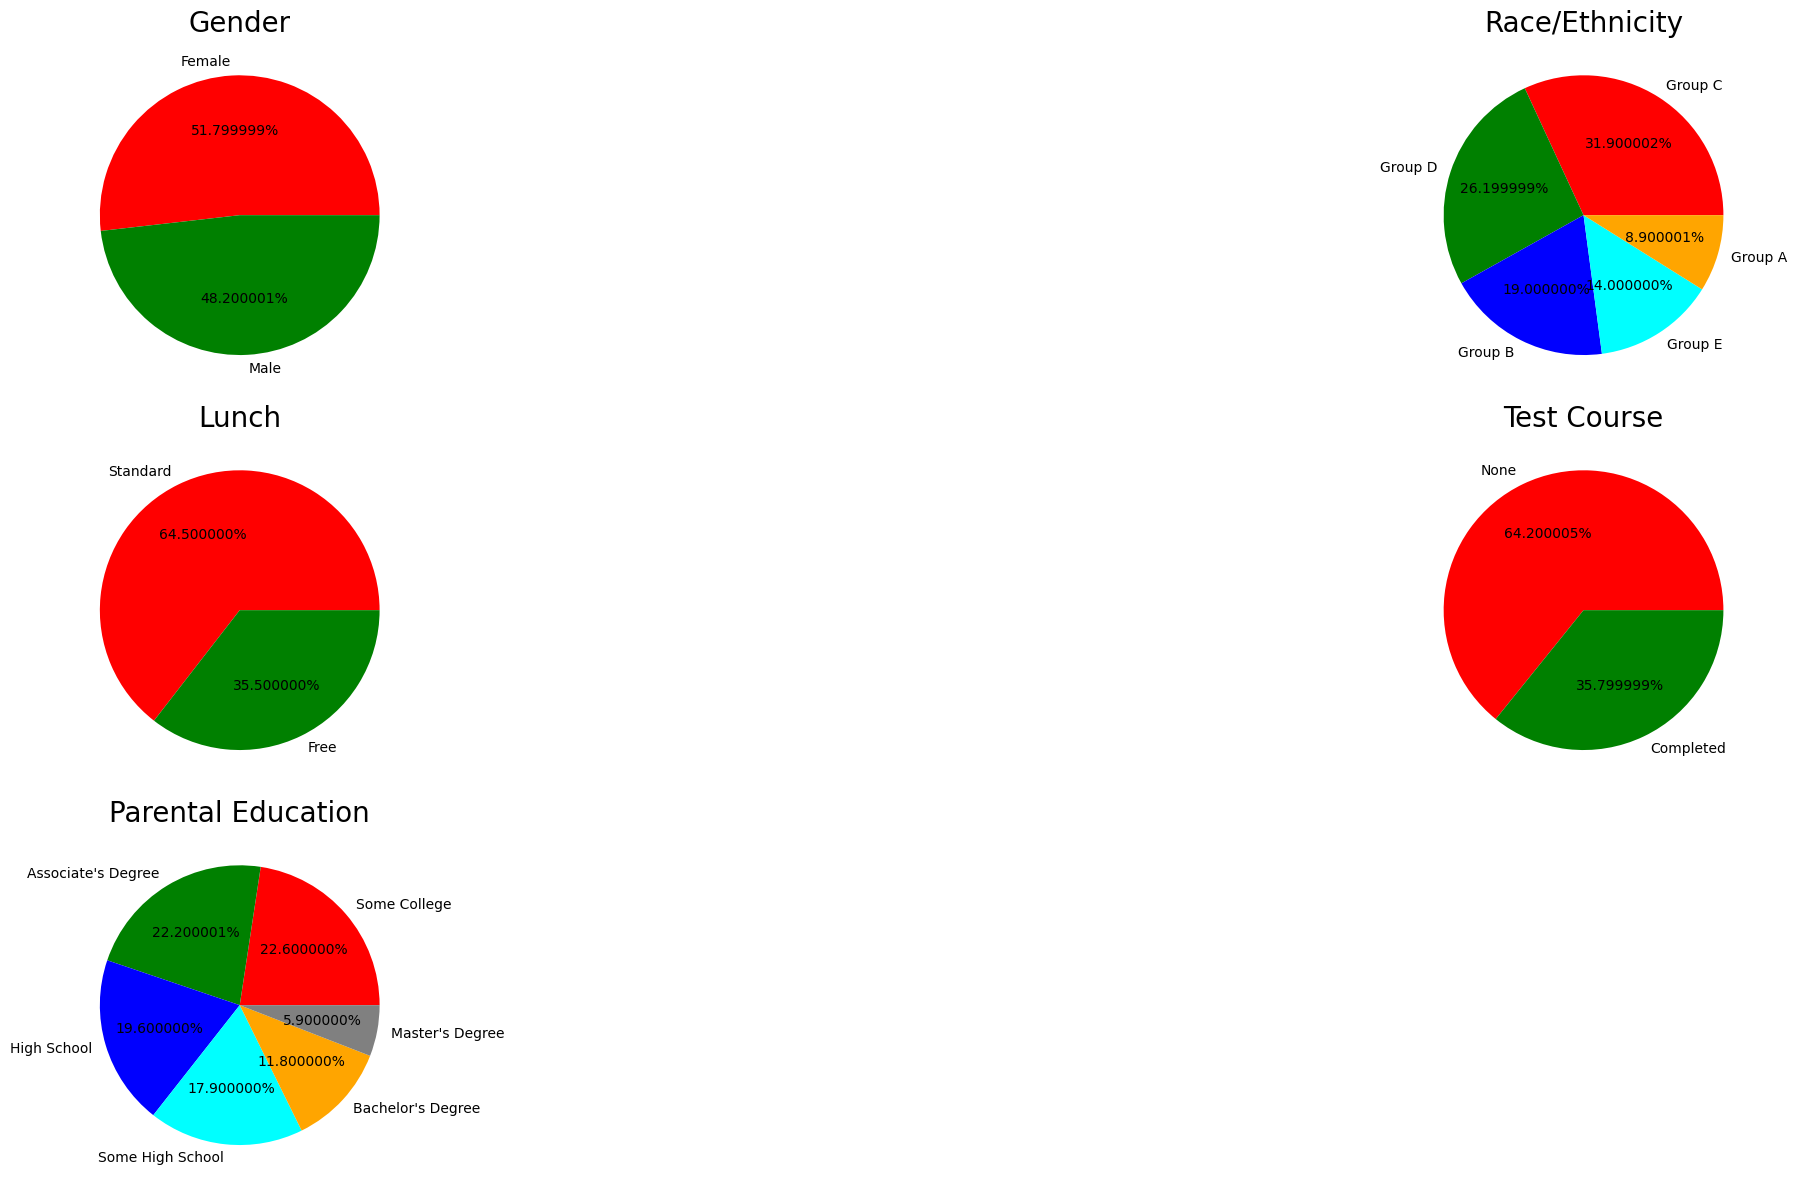

In [61]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(3, 2, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(3, 2, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(3, 2, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(3, 2, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(3, 2, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

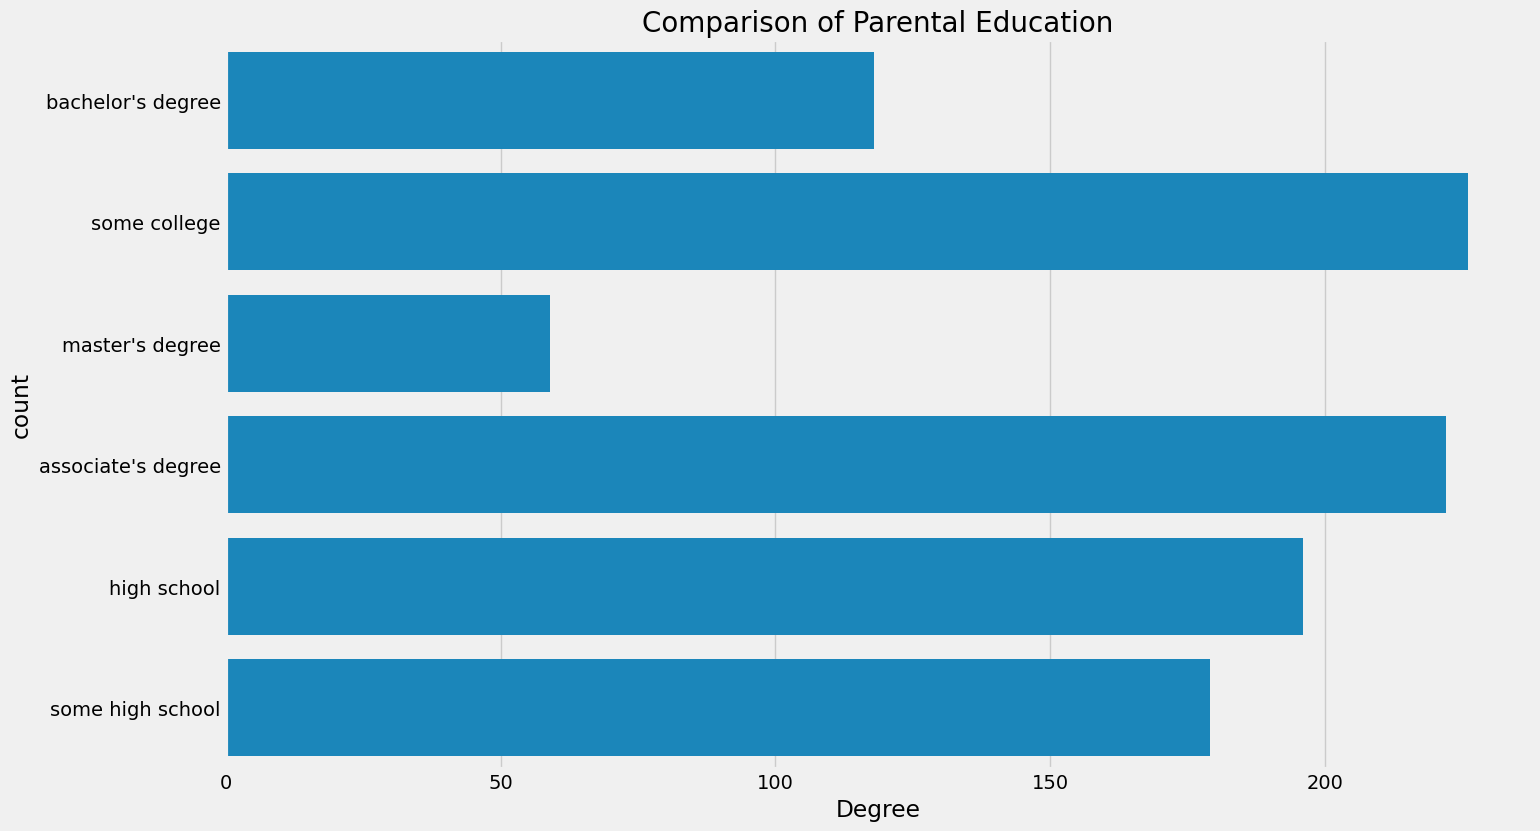

In [63]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'])
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()